# Classification

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

In [47]:
iris = pd.read_csv('iris.csv')

In [48]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [49]:
iris['variety']

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [50]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


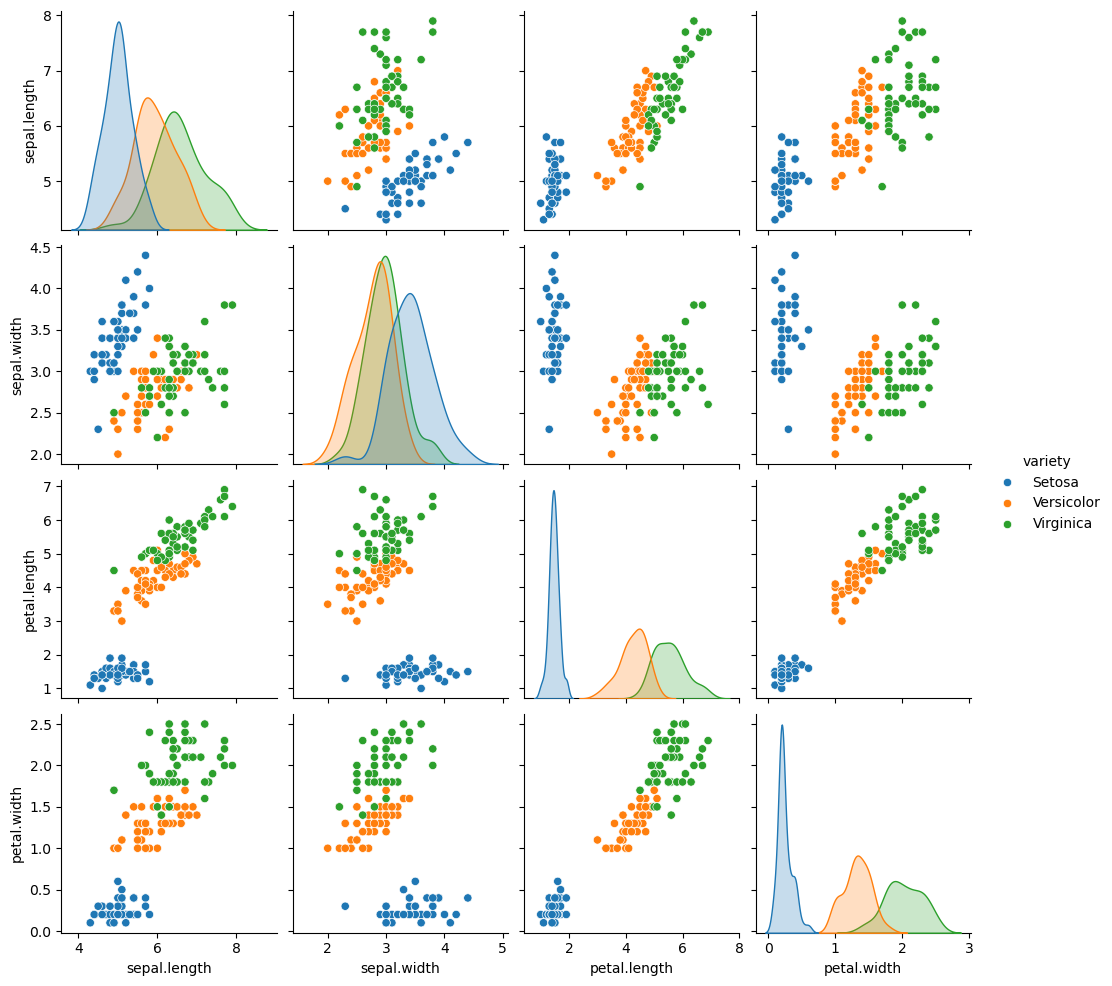

In [51]:
sns.pairplot(iris, hue = 'variety')

In [54]:
iris.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


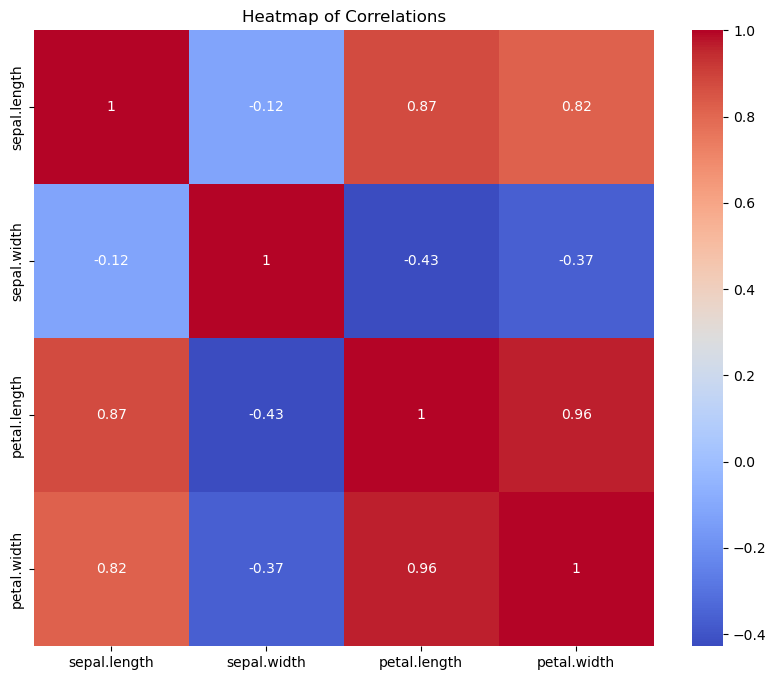

In [57]:
# Tracer la heatmap avec numeric_only=True
plt.figure(figsize=(10, 8))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()

In [58]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [59]:
X = iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]

In [60]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [61]:
y = iris['variety']

In [62]:
y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
print('Données entrainment: ', X_train.shape)
print('Données de test: ', X_test.shape)

Données entrainment:  (105, 4)
Données de test:  (45, 4)


In [64]:
model = KNeighborsClassifier(n_neighbors = 50)

In [65]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [66]:
print('La performance du modèle sur la base des données d\'apprentissage: ', model.score(X_train, y_train))

La performance du modèle sur la base des données d'apprentissage:  0.9047619047619048


In [67]:
predictions = model.predict(X_test)

In [68]:
print('La performance du modèle sur la base des données de test :', model.score(X_test, y_test))

La performance du modèle sur la base des données de test : 0.8888888888888888


In [69]:
cross_val_score(KNeighborsClassifier(15), X_train, y_train, cv = 10, scoring = 'accuracy').mean()

0.9709090909090909

In [70]:
score_validation = []
for k in range(1,26):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 10, scoring = 'accuracy').mean()
    score_validation.append(score)

In [71]:
score_validation

[0.9536363636363637,
 0.9527272727272728,
 0.9536363636363637,
 0.9436363636363636,
 0.9527272727272728,
 0.9436363636363637,
 0.9436363636363637,
 0.9436363636363637,
 0.9618181818181819,
 0.9436363636363637,
 0.9436363636363637,
 0.9427272727272727,
 0.9518181818181818,
 0.9518181818181818,
 0.9709090909090909,
 0.9336363636363638,
 0.9609090909090909,
 0.9609090909090909,
 0.9609090909090909,
 0.9336363636363638,
 0.9427272727272727,
 0.9336363636363638,
 0.9336363636363638,
 0.9336363636363638,
 0.9336363636363638]

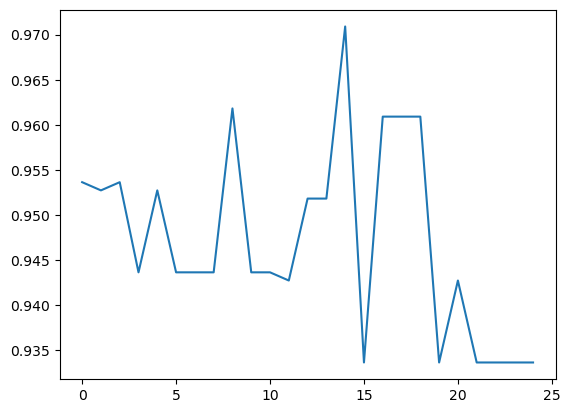

In [72]:
plt.plot(score_validation)

In [73]:
model = KNeighborsClassifier()

In [74]:
k = np.arange(1,26)
score_apprentissage, score_validation = validation_curve(model, X_train, y_train, 
                                                        param_name = 'n_neighbors',
                                                        param_range = k, cv = 10)

In [75]:
score_validation.shape

(25, 10)

In [76]:
score_validation.mean(axis = 1)

array([0.95363636, 0.95272727, 0.95363636, 0.94363636, 0.95272727,
       0.94363636, 0.94363636, 0.94363636, 0.96181818, 0.94363636,
       0.94363636, 0.94272727, 0.95181818, 0.95181818, 0.97090909,
       0.93363636, 0.96090909, 0.96090909, 0.96090909, 0.93363636,
       0.94272727, 0.93363636, 0.93363636, 0.93363636, 0.93363636])

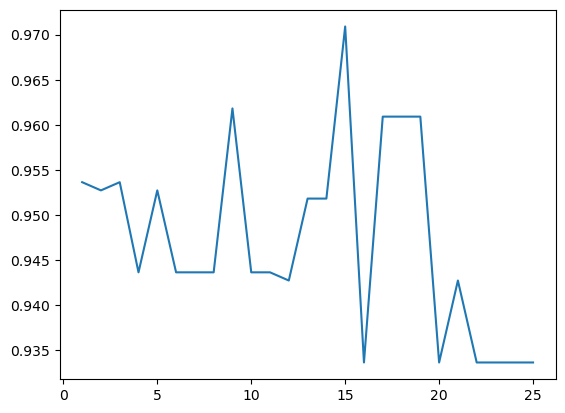

In [77]:
plt.plot(k, score_validation.mean(axis = 1))

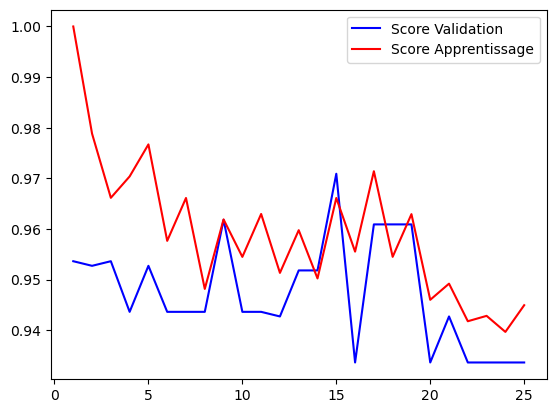

In [78]:
plt.plot(k, score_validation.mean(axis = 1), label="Score Validation", c='b')
plt.plot(k, score_apprentissage.mean(axis = 1), label="Score Apprentissage", c='r')
plt.legend()

In [79]:
grid_param = {'n_neighbors': np.arange(1,25),
             'weights': ['uniform', 'distance'],
             'metric': ['euclidean', 'manhattan', 'minkowski']}

In [80]:
grid = GridSearchCV(KNeighborsClassifier(), grid_param, cv = 10)

In [81]:
grid.fit(X_train, y_train)

C:\Users\Proprio\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [82]:
grid.best_score_

0.9718181818181819

In [83]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

In [84]:
model = grid.best_estimator_

In [85]:
model.score(X_test, y_test)

0.9777777777777777

In [86]:
confusion_matrix(y_test, model.predict(X_test))

array([[16,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 17]], dtype=int64)

In [87]:
model.predict([[10,9, 5, 4]])

C:\Users\Proprio\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Virginica'], dtype=object)

In [88]:
model.predict([[4,2,3,1]])

C:\Users\Proprio\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Versicolor'], dtype=object)

In [89]:
data , score_apprentissage, score_validation = learning_curve(model, X_train, y_train, cv = 10,
                                                             train_sizes = np.linspace(0.2,1.0,10))

In [90]:
data

array([18, 27, 35, 43, 52, 60, 68, 77, 85, 94])

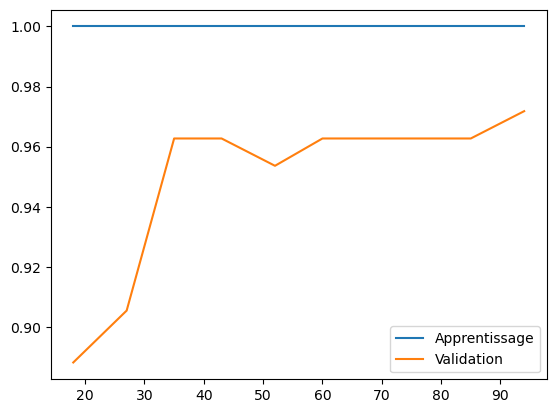

In [91]:
plt.plot(data, score_apprentissage.mean(axis = 1), label = 'Apprentissage')
plt.plot(data, score_validation.mean(axis =1), label = 'Validation')
plt.legend()